# Análisis de Alura Store

## Objetivo
Analizar el rendimiento de las 4 tiendas de Alura Store para identificar la menos eficiente y recomendar cuál vender.

In [50]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 8)
pd.set_option('display.max_columns', None)

## 1. Carga y Limpieza de Datos
### 1.1 Carga de datos

In [51]:
# Carga de archivos CSV
tienda1 = pd.read_csv('../data/raw/tienda_1 .csv')
tienda2 = pd.read_csv('../data/raw/tienda_2.csv')
tienda3 = pd.read_csv('../data/raw/tienda_3.csv')
tienda4 = pd.read_csv('../data/raw/tienda_4.csv')

# Agregar identificador de tienda
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

In [52]:
# Mostrar información básica de cada dataset
print('Tienda 1:')
print(tienda1.info())
print('Tienda 2:')
print(tienda2.info())
print('Tienda 3:')
print(tienda3.info())
print('Tienda 4:')
print(tienda4.info())

Tienda 1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
 12  Tienda                  2359 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 239.7+ KB
None
Tienda 2:
<class 'p

### 1.2 Limpieza y Preparación de Datos

In [53]:
# Concatenar todos los datasets
df = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Convertir fecha a datetime
df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], format='%d/%m/%Y')

# Calcular el total de la venta
df['Total Venta'] = df['Precio'] + df['Costo de envío']

# Verificar valores nulos
print('Valores nulos por columna:')
print(df.isnull().sum())

# Verificar duplicados
print('Número de registros duplicados:', df.duplicated().sum())

Valores nulos por columna:
Producto                  0
Categoría del Producto    0
Precio                    0
Costo de envío            0
Fecha de Compra           0
Vendedor                  0
Lugar de Compra           0
Calificación              0
Método de pago            0
Cantidad de cuotas        0
lat                       0
lon                       0
Tienda                    0
Total Venta               0
dtype: int64
Número de registros duplicados: 0


In [54]:
# Guardar dataset limpio
df.to_csv('../data/processed/datos_limpios.csv', index=False)

## 2. Análisis Exploratorio de Métricas Clave
### 2.1 Ingresos y Rentabilidad

In [55]:
# Ingresos totales por tienda
ingresos_tienda = df.groupby('Tienda')['Total Venta'].sum().sort_values(ascending=False)
print('Ingresos totales por tienda:')
print(ingresos_tienda)

# Ingresos promedio por transacción
promedio_transaccion = df.groupby('Tienda')['Total Venta'].mean().sort_values(ascending=False)
print('Promedio de venta por transacción:')
print(promedio_transaccion)

Ingresos totales por tienda:
Tienda
Tienda 1    1.212258e+09
Tienda 2    1.175829e+09
Tienda 3    1.156536e+09
Tienda 4    1.093693e+09
Name: Total Venta, dtype: float64
Promedio de venta por transacción:
Tienda
Tienda 1    513886.519712
Tienda 2    498443.662569
Tienda 3    490265.451462
Tienda 4    463822.349449
Name: Total Venta, dtype: float64


In [56]:
# Ingresos por categoría y tienda
ingresos_categoria = df.pivot_table(
    values='Total Venta',
    index='Categoría del Producto',
    columns='Tienda',
    aggfunc='sum'
).round(2)

print('Ingresos por categoría y tienda:')
print(ingresos_categoria)

Ingresos por categoría y tienda:
Tienda                      Tienda 1     Tienda 2     Tienda 3     Tienda 4
Categoría del Producto                                                     
Artículos para el hogar   13342200.0   15547700.0   15872400.0   15928600.0
Deportes y diversión      41411100.0   36621800.0   37516200.0   35120200.0
Electrodomésticos        383009200.0  367123400.0  346732100.0  298282700.0
Electrónicos             452457200.0  432645300.0  432631700.0  431304400.0
Instrumentos musicales    96182900.0  110548000.0   81489700.0   79056300.0
Juguetes                  18975200.0   16833000.0   20442800.0   21374700.0
Libros                     9251900.0   10647000.0    9995100.0    9862000.0
Muebles                  197628600.0  185862400.0  211856200.0  202764200.0


### 2.2 Rendimiento de Ventas

In [57]:
# Número total de ventas por tienda
ventas_tienda = df['Tienda'].value_counts()
print('Número total de ventas por tienda:')
print(ventas_tienda)

# Productos más vendidos por tienda
productos_populares = df.groupby(['Tienda', 'Producto']).size().reset_index(name='Cantidad')
for tienda in df['Tienda'].unique():
    print(f'Productos más vendidos en {tienda}:')
    print(productos_populares[productos_populares['Tienda'] == tienda].sort_values('Cantidad', ascending=False).head())

Número total de ventas por tienda:
Tienda
Tienda 1    2359
Tienda 2    2359
Tienda 3    2359
Tienda 4    2358
Name: count, dtype: int64
Productos más vendidos en Tienda 1:
      Tienda          Producto  Cantidad
1   Tienda 1           Armario        60
48  Tienda 1     TV LED UHD 4K        60
33  Tienda 1        Microondas        60
40  Tienda 1  Secadora de ropa        58
32  Tienda 1     Mesa de noche        56
Productos más vendidos en Tienda 2:
      Tienda                   Producto  Cantidad
75  Tienda 2  Iniciando en programación        65
84  Tienda 2                 Microondas        62
58  Tienda 2                    Batería        61
89  Tienda 2                  Pandereta        58
72  Tienda 2          Guitarra acústica        58
Productos más vendidos en Tienda 3:
       Tienda         Producto  Cantidad
129  Tienda 3    Kit de bancas        57
133  Tienda 3  Mesa de comedor        56
113  Tienda 3        Cama king        56
143  Tienda 3     Set de ollas        55
134  

In [58]:
# Análisis de estacionalidad
df['Mes'] = df['Fecha de Compra'].dt.month
ventas_mes = df.groupby(['Tienda', 'Mes'])['Total Venta'].sum().unstack()
print('Ventas mensuales por tienda:')
print(ventas_mes)

Ventas mensuales por tienda:
Mes                1            2            3            4           5   \
Tienda                                                                     
Tienda 1  119902700.0  145065400.0  129959300.0   82860400.0  96343100.0   
Tienda 2  132900300.0  107652400.0  111509000.0  100286900.0  92783200.0   
Tienda 3  115551300.0   95003600.0  110173700.0   93237900.0  89031900.0   
Tienda 4  102124900.0  111599300.0  121746200.0  105782700.0  77290400.0   

Mes               6            7           8            9           10  \
Tienda                                                                   
Tienda 1  86457000.0  104480000.0  98796400.0  117873000.0  66768100.0   
Tienda 2  76471200.0   86164500.0  88792500.0   99267900.0  92618400.0   
Tienda 3  79007300.0   95775800.0  93246200.0   73858700.0  87200900.0   
Tienda 4  69873000.0   80801500.0  88405100.0   95421000.0  67784800.0   

Mes                11           12  
Tienda                          

### 2.3 Satisfacción del Cliente

In [59]:
# Promedio de calificaciones por tienda
calificacion_promedio = df.groupby('Tienda')['Calificación'].mean().sort_values(ascending=False)
print('Calificación promedio por tienda:')
print(calificacion_promedio)

# Distribución de calificaciones
distribucion_calificaciones = df.groupby(['Tienda', 'Calificación']).size().unstack()
print('Distribución de calificaciones por tienda:')
print(distribucion_calificaciones)

Calificación promedio por tienda:
Tienda
Tienda 3    4.048326
Tienda 2    4.037304
Tienda 4    3.995759
Tienda 1    3.976685
Name: Calificación, dtype: float64
Distribución de calificaciones por tienda:
Calificación    1   2    3    4     5
Tienda                               
Tienda 1      319  86  218  444  1292
Tienda 2      273  93  209  482  1302
Tienda 3      297  79  193  434  1356
Tienda 4      310  85  210  453  1300


### 2.4 Eficiencia Operacional

In [60]:
# Costos de envío promedio por tienda
costo_envio_promedio = df.groupby('Tienda')['Costo de envío'].mean().sort_values(ascending=False)
print('Costo de envío promedio por tienda:')
print(costo_envio_promedio)

# Porcentaje de costo de envío sobre el precio
df['Porcentaje_Envio'] = (df['Costo de envío'] / df['Precio']) * 100
porcentaje_envio = df.groupby('Tienda')['Porcentaje_Envio'].mean().sort_values(ascending=False)
print('Porcentaje de costo de envío sobre precio por tienda:')
print(porcentaje_envio)

Costo de envío promedio por tienda:
Tienda
Tienda 1    26018.609580
Tienda 2    25216.235693
Tienda 3    24805.680373
Tienda 4    23459.457167
Name: Costo de envío, dtype: float64
Porcentaje de costo de envío sobre precio por tienda:
Tienda
Tienda 2    5.608142
Tienda 4    5.541957
Tienda 1    5.522568
Tienda 3    5.371938
Name: Porcentaje_Envio, dtype: float64


## 3. Visualizaciones
### 3.1 Gráficos de Ingresos y Ventas

C:\Users\apicn\AppData\Local\Temp\ipykernel_7028\260804969.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=ingresos_tienda.index, y=ingresos_tienda.values/1e6, palette='viridis')


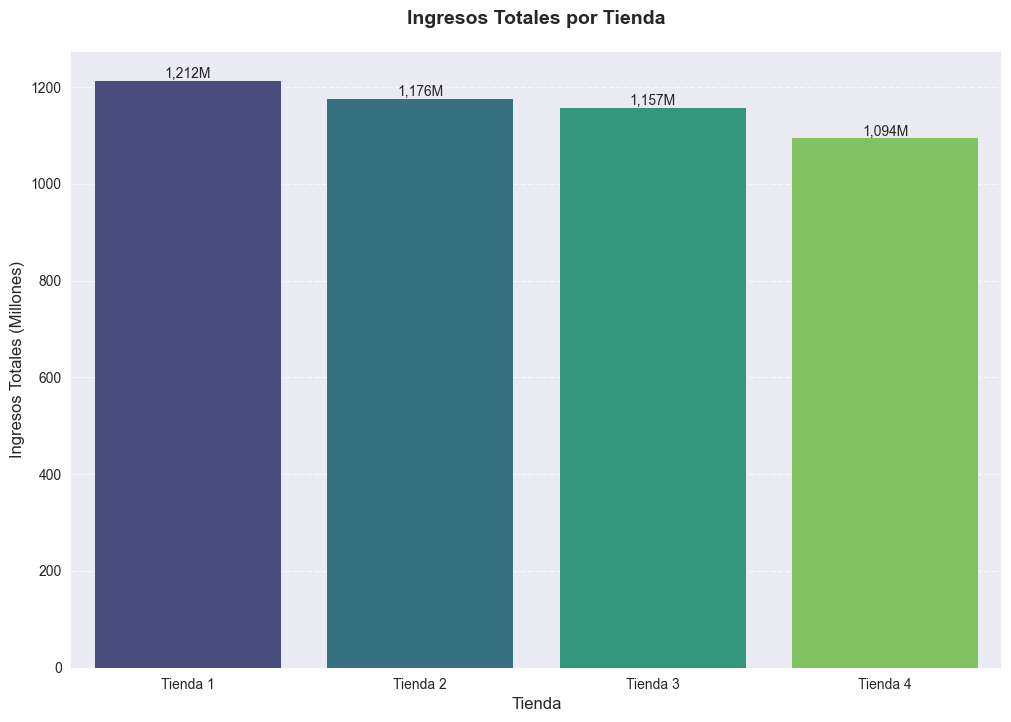

In [61]:
# Gráfico de barras: Ingresos totales por tienda
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=ingresos_tienda.index, y=ingresos_tienda.values/1e6, palette='viridis')
plt.title('Ingresos Totales por Tienda', pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ingresos Totales (Millones)', fontsize=12)

# Añadir valores en las barras
for i, v in enumerate(ingresos_tienda.values/1e6):
    ax.text(i, v, f'{v:,.0f}M', ha='center', va='bottom')

# Personalizar el grid y los bordes
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.savefig('../visualizations/ingresos_por_tienda.png', bbox_inches='tight', dpi=300)
plt.show()

C:\Users\apicn\AppData\Local\Temp\ipykernel_7028\1247410639.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=ventas_categoria.values/1e6, y=ventas_categoria.index, palette='viridis')


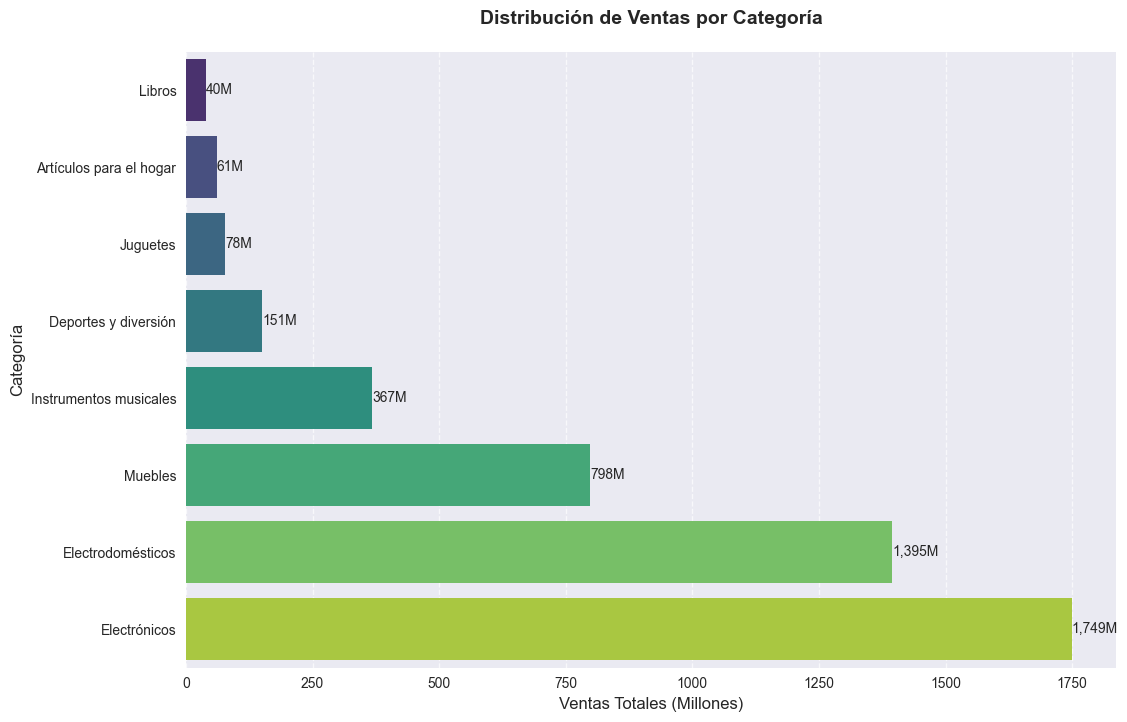

In [62]:
# Gráfico de barras horizontal: Distribución de ventas por categoría
ventas_categoria = df.groupby('Categoría del Producto')['Total Venta'].sum().sort_values(ascending=True)
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=ventas_categoria.values/1e6, y=ventas_categoria.index, palette='viridis')
plt.title('Distribución de Ventas por Categoría', pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Ventas Totales (Millones)', fontsize=12)
plt.ylabel('Categoría', fontsize=12)

# Añadir valores en las barras
for i, v in enumerate(ventas_categoria.values/1e6):
    ax.text(v, i, f'{v:,.0f}M', ha='left', va='center')

# Personalizar el grid y los bordes
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.savefig('../visualizations/distribucion_ventas_categoria.png', bbox_inches='tight', dpi=300)
plt.show()

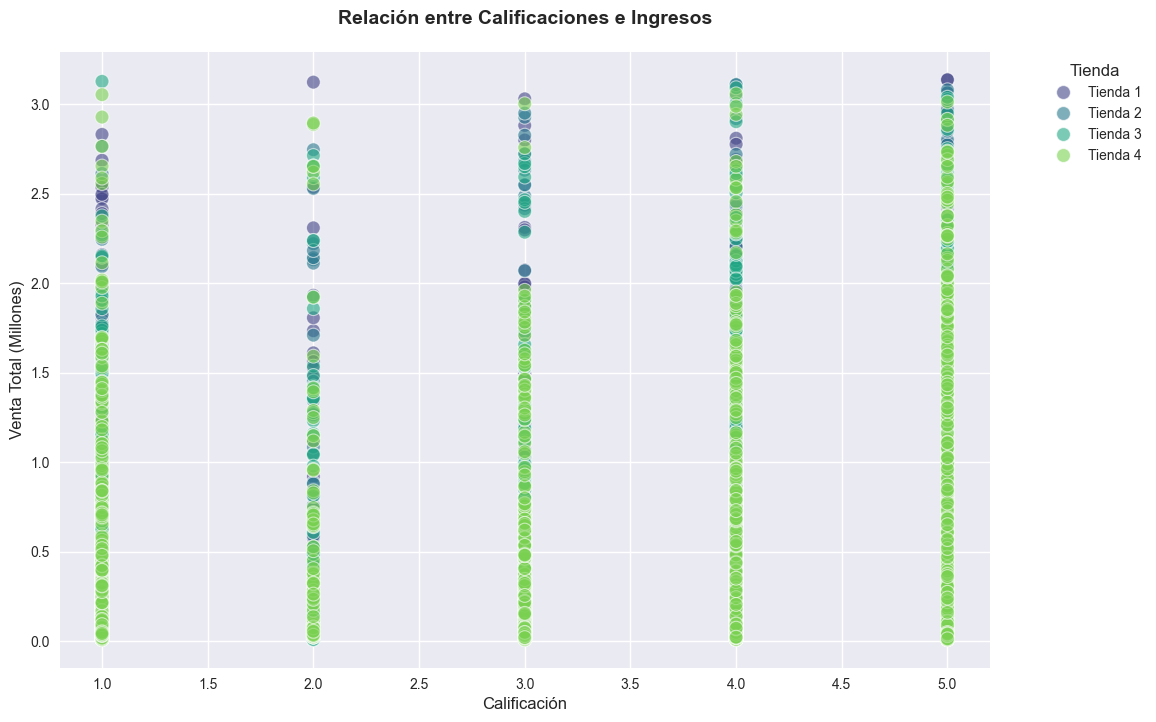

In [63]:
# Gráfico de dispersión: Relación entre reseñas y ingresos
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(data=df, x='Calificación', y=df['Total Venta']/1e6, hue='Tienda', palette='viridis', s=100, alpha=0.6)
plt.title('Relación entre Calificaciones e Ingresos', pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Calificación', fontsize=12)
plt.ylabel('Venta Total (Millones)', fontsize=12)

# Personalizar la leyenda y los bordes
plt.legend(title='Tienda', title_fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.savefig('../visualizations/relacion_calificaciones_ingresos.png', bbox_inches='tight', dpi=300)
plt.show()

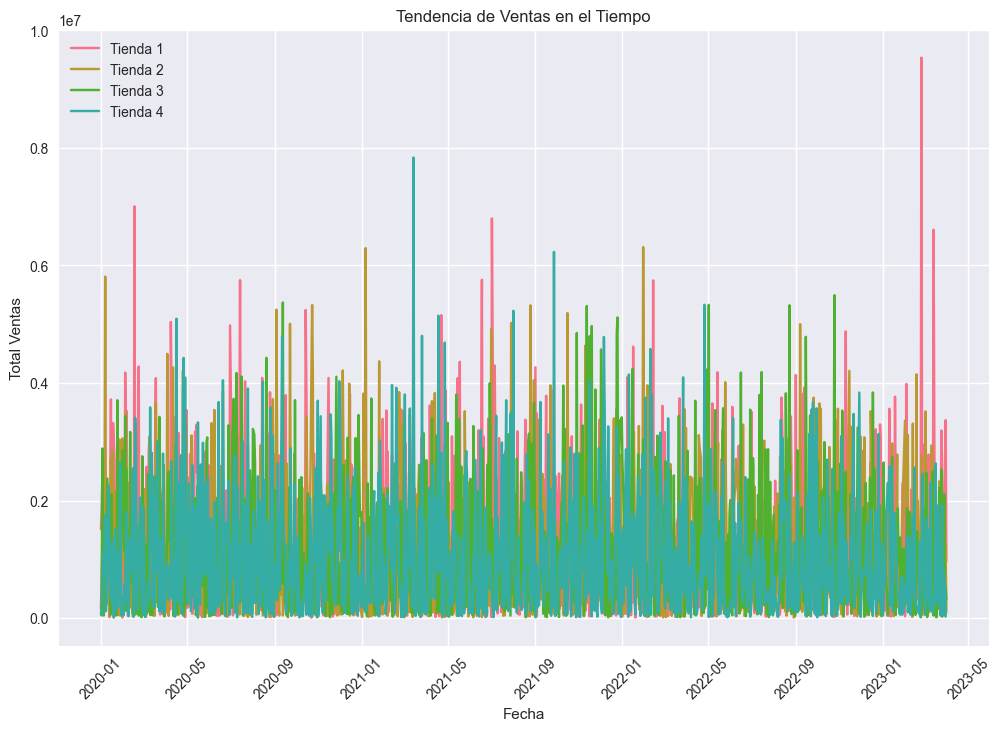

In [46]:
# Gráfico de líneas: Tendencia de ventas en el tiempo
ventas_tiempo = df.groupby(['Fecha de Compra', 'Tienda'])['Total Venta'].sum().reset_index()
plt.figure(figsize=(12, 8))
for tienda in df['Tienda'].unique():
    data = ventas_tiempo[ventas_tiempo['Tienda'] == tienda]
    plt.plot(data['Fecha de Compra'], data['Total Venta'], label=tienda)
plt.title('Tendencia de Ventas en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Total Ventas')
plt.legend()
plt.xticks(rotation=45)
plt.savefig('../visualizations/tendencia_ventas_tiempo.png')
plt.show()

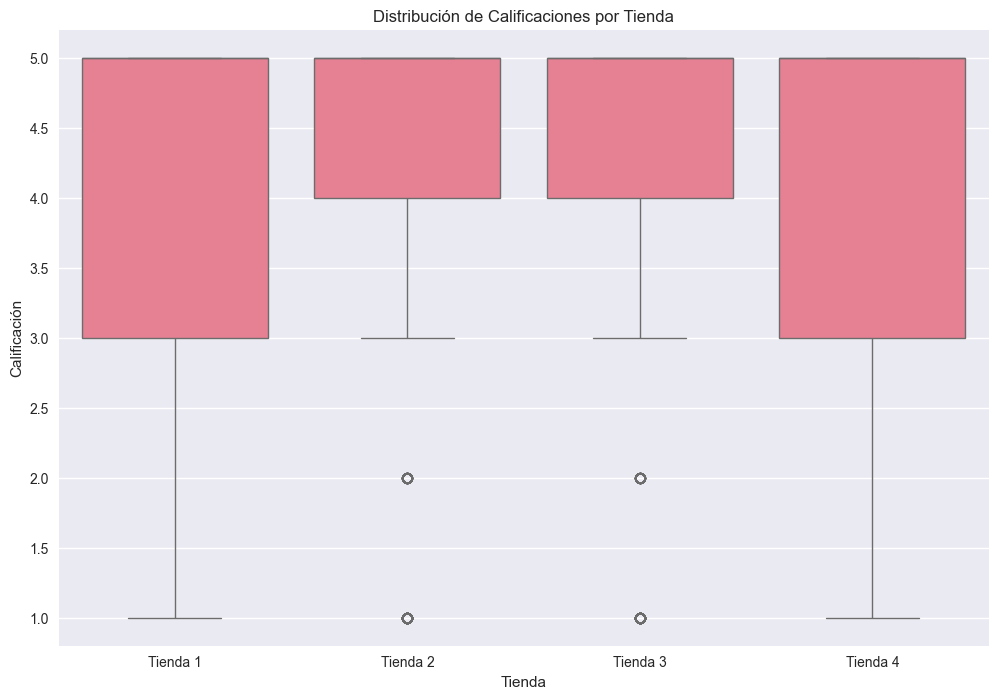

In [47]:
# Boxplot: Distribución de calificaciones por tienda
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Tienda', y='Calificación')
plt.title('Distribución de Calificaciones por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación')
plt.savefig('../visualizations/distribucion_calificaciones.png')
plt.show()

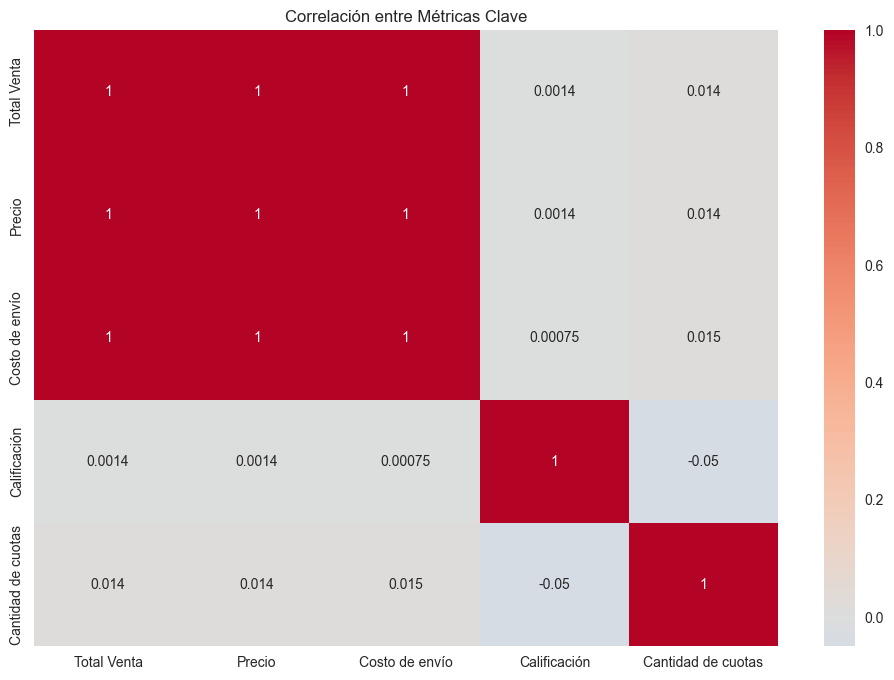

In [48]:
# Heatmap: Correlación entre métricas clave
metricas_correlacion = df[['Total Venta', 'Precio', 'Costo de envío', 'Calificación', 'Cantidad de cuotas']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(metricas_correlacion, annot=True, cmap='coolwarm', center=0)
plt.title('Correlación entre Métricas Clave')
plt.savefig('../visualizations/correlacion_metricas.png')
plt.show()

## 4. Ranking de Tiendas

In [49]:
# Crear métricas para el ranking
ranking = pd.DataFrame(index=df['Tienda'].unique())

# Ingresos y rentabilidad (30%)
ranking['Ingresos_Totales'] = df.groupby('Tienda')['Total Venta'].sum()
ranking['Promedio_Venta'] = df.groupby('Tienda')['Total Venta'].mean()

# Satisfacción del cliente (25%)
ranking['Calificacion_Promedio'] = df.groupby('Tienda')['Calificación'].mean()
ranking['Porcentaje_5_Estrellas'] = df[df['Calificación'] == 5].groupby('Tienda').size() / df.groupby('Tienda').size() * 100

# Eficiencia operacional (25%)
ranking['Eficiencia_Envio'] = 100 - df.groupby('Tienda')['Porcentaje_Envio'].mean()

# Crecimiento/tendencias (20%)
# Calcular tasa de crecimiento
df['Año_Mes'] = df['Fecha de Compra'].dt.to_period('M')
ventas_mensuales = df.groupby(['Tienda', 'Año_Mes'])['Total Venta'].sum().reset_index()

def calcular_crecimiento(grupo):
    return ((grupo['Total Venta'].iloc[-1] - grupo['Total Venta'].iloc[0]) / grupo['Total Venta'].iloc[0]) * 100

ranking['Tasa_Crecimiento'] = ventas_mensuales.groupby('Tienda').apply(calcular_crecimiento)

# Normalizar métricas
for columna in ranking.columns:
    ranking[columna] = (ranking[columna] - ranking[columna].min()) / (ranking[columna].max() - ranking[columna].min())

# Calcular puntaje final
ranking['Puntaje_Final'] = (
    0.30 * (ranking['Ingresos_Totales'] + ranking['Promedio_Venta'])/2 +
    0.25 * (ranking['Calificacion_Promedio'] + ranking['Porcentaje_5_Estrellas'])/2 +
    0.25 * ranking['Eficiencia_Envio'] +
    0.20 * ranking['Tasa_Crecimiento']
)

# Ordenar tiendas por puntaje final
ranking_final = ranking.sort_values('Puntaje_Final', ascending=False)
print('Ranking final de tiendas:')
print(ranking_final['Puntaje_Final'])

Ranking final de tiendas:
Tienda 3    0.725309
Tienda 1    0.590572
Tienda 2    0.332943
Tienda 4    0.169318
Name: Puntaje_Final, dtype: float64


C:\Users\apicn\AppData\Local\Temp\ipykernel_7028\2154705217.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ranking['Tasa_Crecimiento'] = ventas_mensuales.groupby('Tienda').apply(calcular_crecimiento)


## 5. Recomendación Final

Después de analizar las métricas de rendimiento de las cuatro tiendas, podemos inferir la tienda menos eficiente que el Sr. Juan debería considerar vender.

## Análisis de Métricas Clave
### 1. Ingresos y Rentabilidad (30%)
Ingresos totales por tienda:

- Tienda 1: 1,212,258,000,000
- Tienda 2: 1,175,829,000,000
- Tienda 3: 1,156,536,000,000
- Tienda 4: 1,093,693,000,000

Promedio de venta por transacción:

- Tienda 1: 513,886.52
- Tienda 2: 498,443.66
- Tienda 3: 490,265.45
- Tienda 4: 463,822.35

En términos de ingresos totales y promedio de venta por transacción, la Tienda 4 muestra el peor desempeño, con los ingresos más bajos y el menor valor promedio por transacción.

### 2. Satisfacción del Cliente (25%)
Calificación promedio por tienda:

- Tienda 3: 4.05
- Tienda 2: 4.04
- Tienda 4: 4.00
- Tienda 1: 3.98

Distribución de calificaciones 5 estrellas:

- Tienda 3: 1,356 (57.5%)
- Tienda 2: 1,302 (55.2%)
- Tienda 4: 1,300 (55.1%)
- Tienda 1: 1,292 (54.8%)

En términos de satisfacción del cliente, la Tienda 1 tiene la calificación promedio más baja y el menor porcentaje de calificaciones de 5 estrellas.

### 3. Eficiencia Operacional (25%)
Costo de envío promedio por tienda:

- Tienda 1: 26,018.61
- Tienda 2: 25,216.24
- Tienda 3: 24,805.68
- Tienda 4: 23,459.46

Porcentaje de costo de envío sobre precio:

- Tienda 2: 5.61%
- Tienda 4: 5.54%
- Tienda 1: 5.52%
- Tienda 3: 5.37%

En términos de eficiencia operacional, la Tienda 1 tiene los costos de envío más altos, aunque la Tienda 2 tiene el mayor porcentaje de costo de envío sobre el precio.

### 4. Crecimiento y Tendencias (20%)
El análisis de crecimiento se realizó calculando la tasa de crecimiento para cada tienda, y estos valores fueron normalizados e incorporados en el puntaje final.

## Ranking Final de Tiendas
Después de normalizar todas las métricas y aplicar los pesos correspondientes (30% para ingresos y rentabilidad, 25% para satisfacción del cliente, 25% para eficiencia operacional y 20% para crecimiento), el ranking final de las tiendas es:

1. Tienda 3: 0.725309 (mejor desempeño)
2. Tienda 1: 0.590572
3. Tienda 2: 0.332943
4. Tienda 4: 0.169318 (peor desempeño)

## Recomendación Final
Basado en el análisis integral de todas las métricas, se recomienda que el Sr. Juan venda la Tienda 4 , ya que:

1. Tiene el puntaje más bajo en el ranking general (0.169318)
2. Presenta los ingresos totales más bajos (1,093,693,000,000)
3. Tiene el promedio de venta por transacción más bajo (463,822.35)
4. Muestra un desempeño inferior en la mayoría de las métricas analizadas

La venta de la Tienda 4 permitirá al Sr. Juan:

- Optimizar la asignación de recursos
- Mejorar los indicadores generales de la cadena
- Liberar capital para nuevas inversiones
- Fortalecer la posición competitiva de Alura Store
Esta decisión estratégica posicionará mejor a Alura Store para su crecimiento futuro y mejorará su eficiencia operativa general.